In [1]:
import os
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import spacy
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
nlp = spacy.load('fr_core_news_lg')

In [3]:
path = "../../../L3/S2/stage/"

In [4]:
corpus = {}
femmes = []
hommes = []

for filename in os.listdir(path+"corpus_femmes") :
    with open(f"{path}corpus_femmes/{filename}", mode="r", encoding="UTF-8") as file :
        [noun,title] = filename.split("___")
        femmes.append(noun)
        corpus[noun] = file.read()
        
for filename in os.listdir(path+"corpus_hommes") :
    with open(f"{path}corpus_hommes/{filename}", mode="r", encoding="UTF-8") as file :
        [noun,title] = filename.split("___")
        hommes.append(noun)
        corpus[noun] = file.read()
        

In [5]:
def get_freq_matrix(train):
    vectorizer = CountVectorizer(analyzer='word')
    matrix = vectorizer.fit_transform(train)
    tokens = vectorizer.get_feature_names_out()
    return matrix, tokens

In [6]:
matrix, vocab = get_freq_matrix(corpus.values())
matrix_femmes = matrix[:len(femmes)]
matrix_hommes = matrix[len(femmes):]

In [7]:
df = pd.DataFrame(vocab)
#df.to_csv("vocabulaire.csv")

In [8]:
general_count_femmes = np.sum(matrix_femmes.toarray(),axis=0)
general_count_hommes = np.sum(matrix_hommes.toarray(),axis=0)

n_word_femmes = sum(general_count_femmes)
n_word_hommes = sum(general_count_hommes)

# Utilisation des affects : comparaison des deux parties

In [29]:
classement_femmes = sorted(zip(vocab,general_count_femmes), key=lambda item:item[1], reverse=True)
classement_hommes = sorted(zip(vocab,general_count_hommes), key=lambda item:item[1], reverse=True)

dict_femmes = dict(classement_femmes)
dict_hommes = dict(classement_hommes)


{'de': 73091,
 'et': 40388,
 'la': 39913,
 'le': 32196,
 'il': 28012,
 'que': 25949,
 'je': 25246,
 'les': 22042,
 'un': 20796,
 'elle': 19504,
 'en': 19442,
 'vous': 19087,
 'ne': 17533,
 'qui': 16868,
 'une': 16506,
 'qu': 16347,
 'est': 15762,
 'pas': 15523,
 'ce': 13703,
 'dans': 13265,
 'pour': 12626,
 'des': 11958,
 'se': 11585,
 'son': 11253,
 'lui': 10805,
 'plus': 9682,
 'me': 9675,
 'mais': 9084,
 'du': 9069,
 'sa': 9057,
 'était': 8353,
 'avec': 7961,
 'au': 7716,
 'si': 7674,
 'avait': 7369,
 'on': 7268,
 'sur': 7196,
 'mon': 7087,
 'tout': 7055,
 'ses': 6707,
 'nous': 6704,
 'cette': 6086,
 'bien': 6053,
 'par': 5997,
 'moi': 5669,
 'comme': 5409,
 'ai': 5262,
 'ma': 5210,
 'dit': 4955,
 'sans': 4734,
 'tu': 4621,
 'même': 4231,
 'être': 4191,
 'ces': 3358,
 'madame': 3347,
 'où': 3260,
 'fait': 3125,
 'encore': 3111,
 'votre': 3108,
 'ils': 3065,
 'faire': 3045,
 'quand': 2796,
 'rien': 2603,
 'suis': 2577,
 'leur': 2568,
 'peu': 2513,
 'peut': 2508,
 'aux': 2451,
 'tous'

In [10]:
racines = {
    "tristesse" : [
        "triste", "tristesse", "tristes", "tristement", 
        "attristé", "attristée", "attristés", "attristées"
        ],
    "peine" : [
        "peine", "peiné", "peines"
        ],
    "chagin" : [
        "chagrin", "chagriné", "chagrinée", 
        "chagrine","chagriner"
        ]
}

In [27]:
racine2freq_femmes = {}
racine2freq_hommes = {}

for racine in racines :
    for word in racines[racine]:
        racine2freq_femmes[racine] = round(racine2freq_femmes.get(racine,0)+dict_femmes[word]/n_word_femmes,5)
        racine2freq_hommes[racine] = round(racine2freq_hommes.get(racine,0)+dict_hommes[word]/n_word_hommes,5)

In [28]:
print(racine2freq_femmes)
print(racine2freq_hommes)

{'tristesse': 0.00052, 'peine': 0.00068, 'chagin': 0.00013}
{'tristesse': 0.0003, 'peine': 0.00052, 'chagin': 9e-05}


# Répartition de l'emploi des affects

In [17]:
word = "colère"

In [18]:
freq_femmes = [dict(sorted(zip(vocab,vector), key = lambda x : x[1], reverse=True)) for vector in matrix_femmes.toarray()]
freq_hommes = [dict(sorted(zip(vocab,vector), key = lambda x : x[1], reverse=True)) for vector in matrix_hommes.toarray()]
count_femmes = [frequences[word] for frequences in freq_femmes]
count_hommes = [frequences[word] for frequences in freq_hommes]

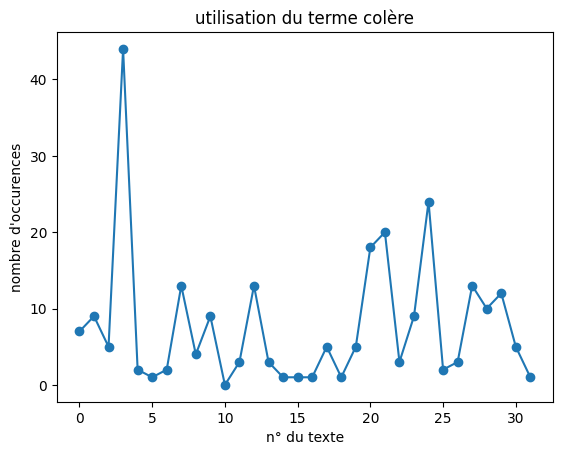

In [19]:
x = range(len(count_femmes))  # Generate x-axis values as indices of the data list

plt.plot(x, count_femmes, marker='o')  # Create a line graph with markers
plt.xlabel('n° du texte')
plt.ylabel("nombre d'occurences")
plt.title(f'utilisation du terme {word}')

plt.show()  # Display the graph

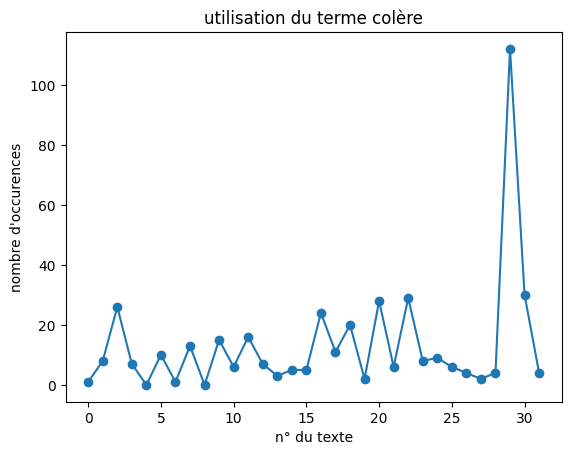

In [20]:
x = range(len(count_hommes))  # Generate x-axis values as indices of the data list

plt.plot(x, count_hommes, marker='o')  # Create a line graph with markers
plt.xlabel('n° du texte')
plt.ylabel("nombre d'occurences")
plt.title(f'utilisation du terme {word}')

plt.show()  # Display the graph

# Termes les plus relevant par partie